# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
!pip install chart_studio
from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

# 1.1 Loading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/Assignments_DonorsChoose_2018/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

## 1.2 Preprocessing Categorical Data

### 1.2.1 preprocessing `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [6]:
sorted_cat_dict.keys()

dict_keys(['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language'])

### 1.2.2 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    sub_cat_list.append(temp.strip())
    
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [8]:
sorted_sub_cat_dict.keys()

dict_keys(['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy'])

### 1.2.3 preprocessing of `School State`

In [9]:
project_data['school_state'].unique()

array(['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY',
       'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV',
       'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ',
       'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD',
       'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT'], dtype=object)

In [10]:
project_data['school_state'][project_data['school_state'].isnull()==True]

Series([], Name: school_state, dtype: object)

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

In [12]:
sorted_school_state_dict.keys()

dict_keys(['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA'])

### 1.2.4 preprocessing of `Teacher Prefix`

In [13]:
project_data.groupby(['teacher_prefix'])['teacher_prefix'].count()

teacher_prefix
Dr.           13
Mr.        10648
Mrs.       57269
Ms.        38955
Teacher     2360
Name: teacher_prefix, dtype: int64

In [14]:
project_data['teacher_prefix'][project_data['teacher_prefix'].isnull()==True]

7820     NaN
30368    NaN
57654    NaN
Name: teacher_prefix, dtype: object

In [0]:
project_data['teacher_prefix'].fillna(project_data['teacher_prefix'].mode()[0],inplace=True)

In [16]:
project_data['teacher_prefix'][project_data['teacher_prefix'].isnull()==True]

Series([], Name: teacher_prefix, dtype: object)

In [17]:
project_data['teacher_prefix'].unique()

array(['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.'], dtype=object)

In [0]:
teacher_prefix = list(project_data['teacher_prefix'].values)

teacher_prefix_list = []
for i in teacher_prefix:
    temp = ""
    temp = i.split('.')
    temp = i.replace('.','')   
    teacher_prefix_list.append(temp)

project_data['clean_teacher_prefix'] = teacher_prefix_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_teacher_prefix'].values:
    my_counter.update(word.split())
    
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

In [19]:
sorted_teacher_prefix_dict.keys()

dict_keys(['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs'])

In [20]:
project_data.groupby(['clean_teacher_prefix'])['clean_teacher_prefix'].count()

clean_teacher_prefix
Dr            13
Mr         10648
Mrs        57272
Ms         38955
Teacher     2360
Name: clean_teacher_prefix, dtype: int64

### 1.2.5 preprocessing of `Project Grade Category`

In [21]:
project_data.groupby(['project_grade_category'])['project_grade_category'].count()

project_grade_category
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Grades PreK-2    44225
Name: project_grade_category, dtype: int64

In [22]:
project_data['project_grade_category'][project_data['project_grade_category'].isnull()==True]

Series([], Name: project_grade_category, dtype: object)

In [0]:
project_grade_category = list(project_data['project_grade_category'].values)

project_grade_category_list = []
for i in project_grade_category:
    temp = ""
    temp = i.split(' ')
    temp = i.replace('Grades ','')   
    project_grade_category_list.append(temp)

project_data['clean_project_grade_category'] = project_grade_category_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_project_grade_category'].values:
    my_counter.update(word.split())
    
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))

In [24]:
sorted_project_grade_category_dict.keys()

dict_keys(['9-12', '6-8', '3-5', 'PreK-2'])

In [25]:
project_data.groupby(['clean_project_grade_category'])['clean_project_grade_category'].count()

clean_project_grade_category
3-5       37137
6-8       16923
9-12      10963
PreK-2    44225
Name: clean_project_grade_category, dtype: int64

## 1.3 Text Preprocessing of project_essay

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [27]:
project_data.head(1)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...

[1 rows x 18 columns]

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [29]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [30]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [31]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [33]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:02<00:00, 1735.30it/s]


In [34]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [0]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)

## 1.4 Preprocessing of `project_title`

In [36]:
project_data['project_title'][2000:2010]

2000                    Steady Stools for Active Learning
2001                                   Classroom Supplies
2002    Kindergarten Students Deserve Quality  Books a...
2003                                Listen to Understand!
2004                             iPads to iGnite Learning
2005                                 Tablets For Learning
2006                                             Go P.E.!
2007                                 Making Learning Fun!
2008    Empowerment Through Silk Screen Designed Tee S...
2009                                 Let's Play Together!
Name: project_title, dtype: object

In [37]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 41572.97it/s]


In [38]:
preprocessed_titles[2000:2010]

['steady stools active learning',
 'classroom supplies',
 'kindergarten students deserve quality books vibrant rug',
 'listen understand',
 'ipads ignite learning',
 'tablets for learning',
 'go p e',
 'making learning fun',
 'empowerment through silk screen designed tee shirts',
 'let play together']

In [0]:
project_data['preprocessed_titles'] = preprocessed_titles
project_data.drop(['project_title'], axis=1, inplace=True)

 <h2>1.5 Merging Numerical data in Resources to project_data</h2>

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [41]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 20 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    109248 non-null  int64  
 1   id                                            109248 non-null  object 
 2   teacher_id                                    109248 non-null  object 
 3   school_state                                  109248 non-null  object 
 4   project_submitted_datetime                    109248 non-null  object 
 5   project_essay_1                               109248 non-null  object 
 6   project_essay_2                               109248 non-null  object 
 7   project_essay_3                               3758 non-null    object 
 8   project_essay_4                               3758 non-null    object 
 9   project_resource_summary                      10

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - Essay : text data
 
       - quantity : numerical 
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [0]:
data1 = project_data.drop(['Unnamed: 0', 'id','project_submitted_datetime','project_essay_1','project_essay_2','project_essay_3','project_essay_4','project_resource_summary','teacher_id'], axis = 1)

In [43]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 11 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   school_state                                  109248 non-null  object 
 1   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 2   project_is_approved                           109248 non-null  int64  
 3   clean_categories                              109248 non-null  object 
 4   clean_subcategories                           109248 non-null  object 
 5   clean_teacher_prefix                          109248 non-null  object 
 6   clean_project_grade_category                  109248 non-null  object 
 7   preprocessed_essays                           109248 non-null  object 
 8   preprocessed_titles                           109248 non-null  object 
 9   price                                         10

## Train test split 

In [0]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, data1['project_is_approved'], test_size=0.33, stratify=data1['project_is_approved'])

In [0]:
#Features
X_train.drop(['project_is_approved'], axis=1, inplace=True)

X_test.drop(['project_is_approved'], axis=1, inplace=True)

In [46]:
X_train.head()

school_state  ...  quantity
51345            IL  ...       186
89329            TX  ...         1
100922           NJ  ...         8
70847            MN  ...         2
55269            MA  ...        29

[5 rows x 10 columns]

<h2>1.6 Make Data Model Ready: encoding essay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 1.6.1 TF IDF Essay and Title

##### 1.6.1.1 TF IDF Essay

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)



(73196, 10) (73196,)
(36052, 10) (36052,)
After vectorizations
(73196, 48269) (73196,)
(36052, 48269) (36052,)


##### 1.6.1.2 TF IDF Title

In [49]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['preprocessed_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['preprocessed_titles'].values)
X_test_title_tfidf = vectorizer.transform(X_test['preprocessed_titles'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)


(73196, 10) (73196,)
(36052, 10) (36052,)
After vectorizations
(73196, 14121) (73196,)
(36052, 14121) (36052,)


<h2>1.7 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 1.7.1 Numerical features

    1. teacher_number_of_previously_posted_projects
    2. price
    3. quantity

##### 1.7.1.1 Teacher number of previously posted projects

In [51]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_TPPP_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_TPPP_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_TPPP_norm.shape, y_train.shape)
print(X_test_TPPP_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [52]:
print("Transpose of teacher number of previously posted projects")

X_train_TPPP_norm = X_train_TPPP_norm.transpose()
X_test_TPPP_norm = X_test_TPPP_norm.transpose()

print("After transpose")
print(X_train_TPPP_norm.shape, y_train.shape)
print(X_test_TPPP_norm.shape, y_test.shape)
print("="*100)

Transpose of teacher number of previously posted projects
After transpose
(73196, 1) (73196,)
(36052, 1) (36052,)


##### 1.7.1.2 price

In [53]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [54]:
print("Transpose of price")

X_train_price_norm = X_train_price_norm.transpose()
X_test_price_norm = X_test_price_norm.transpose()


print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

Transpose of price
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


##### 1.7.1.3 quantity

In [55]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [56]:
print("Transpose of Quantity")

X_train_quantity_norm = X_train_quantity_norm.transpose()
X_test_quantity_norm = X_test_quantity_norm.transpose()


print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

Transpose of Quantity
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


### 1.7.2 Categorical Data

#### Categorical Features for vectorization

    1. Clean Categories
    2. Clean Sub Categories
    3. School State
    4. Teacher Prefix
    5. Project grade category

##### 1.7.2.1 Clean Categories 

In [57]:
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_CC_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_CC_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_CC_ohe.shape, y_train.shape)
print(X_test_CC_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


##### 1.7.2.2 Clean Sub Categories 

In [58]:
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_CSC_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_CSC_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_CSC_ohe.shape, y_train.shape)
print(X_test_CSC_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


##### 1.7.2.3 School State

In [59]:
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']


##### 1.7.2.4 Teacher prefix

In [60]:
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['clean_teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['clean_teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


##### 1.7.2.5 Project Grade category

In [61]:
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['clean_project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['clean_project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['9-12', '6-8', '3-5', 'PreK-2']


### Concatinating all the features

In [62]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_TFIDF = hstack((X_train_essay_tfidf, X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_CSC_ohe, X_train_CC_ohe, X_train_price_norm, X_train_quantity_norm, X_train_TPPP_norm)).tocsr()
X_te_TFIDF = hstack((X_test_essay_tfidf, X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_CSC_ohe, X_test_CC_ohe, X_test_price_norm, X_test_quantity_norm, X_test_TPPP_norm)).tocsr()

print("Final Data matrix")
print(X_tr_TFIDF.shape, y_train.shape)
print(X_te_TFIDF.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 62492) (73196,)
(36052, 62492) (36052,)


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

# Clustering 

## 2.1 Choose the best data matrix on which you got the best AUC

In [1]:
# I used set1 features where text is represented as TFIDF Vectorization of essay and title

## 2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

```
# Already done at top
```

## 2.3 Make Data Model Ready: encoding eassay, and project_title

```
# Already done at top
```

## 2.4 Selecting Best-k features (or) Dimensionality Reduction to get k-features

use only top 5000 Features using selectKbest

In [0]:
from sklearn.feature_selection import SelectKBest, chi2
t = SelectKBest(chi2,k=5000).fit(X_tr_TFIDF, y_train)
X_tr = t.transform(X_tr_TFIDF)
X_te = t.transform(X_te_TFIDF)

In [64]:
print("Final Data matrix on TFIDF")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix on TFIDF
(73196, 5000) (73196,)
(36052, 5000) (36052,)


## 2.5 Apply Kmeans

In [72]:
from sklearn.cluster import KMeans
clusters = [2, 3, 4, 5, 6, 7, 10, 15, 20]
loss = []
for i in tqdm(clusters):
    Kmean = KMeans(n_clusters=i,n_jobs=-1).fit(X_tr)
    loss.append(Kmean.inertia_)

100%|██████████| 9/9 [1:39:28<00:00, 663.21s/it]


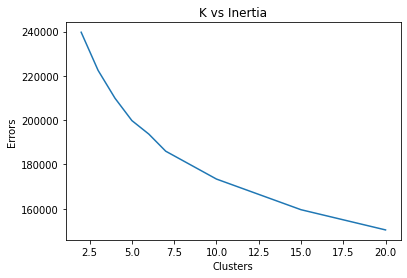

In [74]:
plt.plot(clusters, loss)
plt.xlabel('Clusters')
plt.ylabel('Errors')
plt.title('K vs Inertia')
plt.show()

### Optimal n_clusters

In [111]:
from sklearn.cluster import KMeans
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1)
kmeans.fit(X_tr)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
kmeans.n_clusters

7

In [113]:
kmeans.labels_

array([0, 0, 3, ..., 5, 6, 6], dtype=int32)

In [124]:
cluster_dataset = {i:[] for i in range(optimal_k)}

for index in tqdm(range(kmeans.labels_.shape[0])):    
    cluster_dataset[kmeans.labels_[index]].append(X_train["preprocessed_essays"].iloc[index])

print("length of each cluster:")
for i in cluster_dataset:
    print(len(cluster_dataset[i]))

100%|██████████| 73196/73196 [00:01<00:00, 55764.10it/s]

length of each cluster:
8801
6115
12572
9160
11143
12011
13394


### Examining each cluster and its wordcloud

In [0]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def examine_cluster_with_wordcloud(cluster_data):
    for paragraph in cluster_data[:3]:
        print(paragraph)
        print("-"*80)
        
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, random_state=28).generate(str(cluster_data))
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    print("="*80)

have ever made plans try new recipe create something you envisioned serving eating dish using new creation you may even started creating dish project found pause project not ingredients materials needed do remember disappointment frustration felt could not follow plan that sometimes happens students resources need succeed it amazing watch middle school students grow see evidence growth collaborative conversations writing student products data they learning set academic goals create plans utilize strategies meet goals unfortunately sometimes start moving full speed ahead toward achieving goals find not supplies resources need sadly lose momentum get back track success seventh eighth grade students use interactive notebooks learn constitution prepare federal constitution test the notebooks used take notes create study guides house foldable student products organizers student creations work social studies stations not interactive notebooks serve students well study constitution also serve

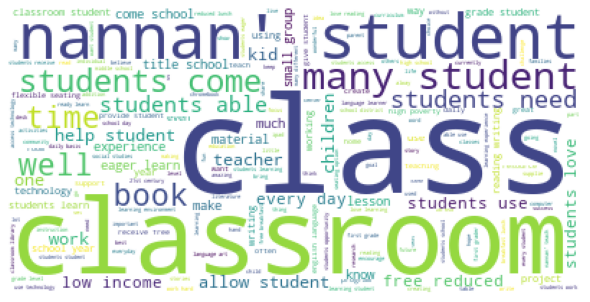

In [126]:
examine_cluster_with_wordcloud(cluster_dataset[0])

my students eclectic mix movers shakers they full energy energy not always reserved playground this active group 34 students insists learning easier entire body involved they like freedom wiggle work my students come variety socioeconomic backgrounds ethnicities many school one constant lives no matter home life like one deserves opportunity learn environment welcoming encouraging as students become focused comfortable become productive reach highest potential potential sometimes surprises even my students told hard sit still work some described human bouncy balls wanted know important sit still i told 34 kids classroom not much sitting still part important seat seat respect space i thought discussion days later class meeting group students asked could get wiggle seats like seen classrooms i replied great idea asked one going pay chairs because great items classroom generously donated donorschoose suggested submit project asking chairs share brilliant idea i said we spent time looking 

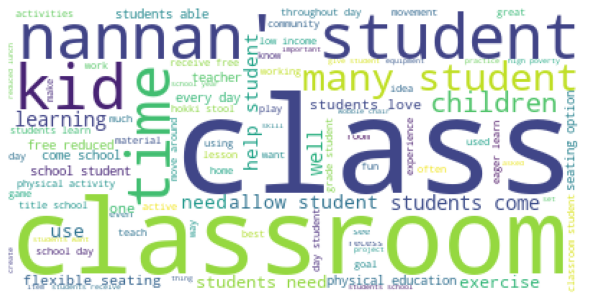

In [127]:
examine_cluster_with_wordcloud(cluster_dataset[1])

as teacher low income high poverty school district students faced many challenges classroom despite many challenges face i looking help engage learning exploring creativity us history they learn best active participation movement around classroom hands activities many challenges face may prevent getting ahead early life necessary supplies from minute walk classroom i focus potential growth i may not able control home lives however i control experience school day help ignite love learning especially american history by creative positive way i hopeful inspire even earliest learners continue path academic excellence my students materials needed participate active engaged learning activities the students use paper creating manipulatives help learn us history the paper also used differentiate instruction according student needs the markers glue scissors enable develop projects enable explore creativity bring history life the pens pencils provide students may not necessary materials class ab

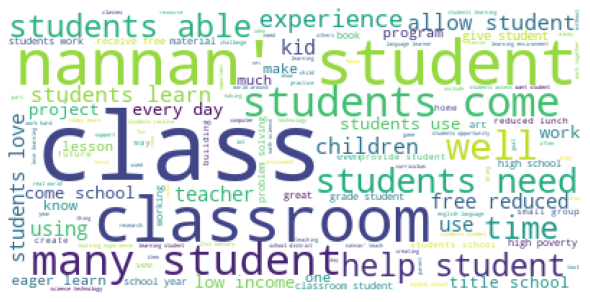

In [128]:
examine_cluster_with_wordcloud(cluster_dataset[2])

my 1st grade students attend small school strong community our elementary school provides learning experience meets needs students instruction differentiated unique learner they like move love read love lots positive attention flexible seating choice provided students allows work around room comfortably focused it provides students environment need best every year students best get wiggles students best standing kneeling number positions little bodies find comfy the choices students feel invested responsible learning when i give students choices i see greater engagement excitement higher desire learn their effort increases certain amount pride comes work some immediate benefits flexible seating include burning calories using excess energy increased motivation engagement improving core strength overall posture the materials students need already home need help getting door the large carpet placed front classroom used gathering place mini lessons share time the bean bags carry around cus

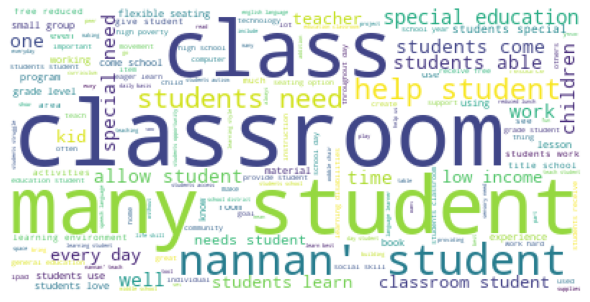

In [129]:
examine_cluster_with_wordcloud(cluster_dataset[3])

in first grade classroom students come variety backgrounds experiences two thirds students come families speak another language home we first graders fluent six different languages born asia africa latin america united states many students also come families experiencing poverty they love coming school love my first graders come school excited learn new things grow make friends play they active learners need movement throughout day maximize learning healthy jumping running place dancing stretching helps grow fun ready learning i engage families first graders home visits academic parent teacher teams the families students excited helping first graders become readers reading books home helping develop deeper understanding book talking books read home in class i students new united states learning speak english well learning read english their reading skills kindergarten pre kindergarten level they need interesting books beginning reading level take home read families while learning read 

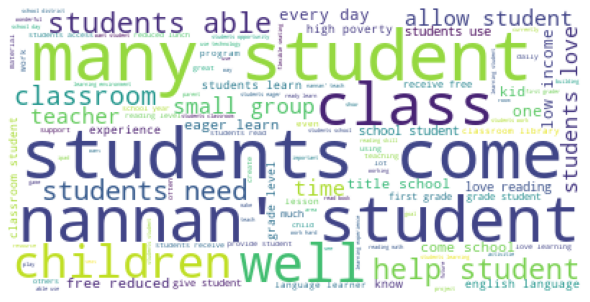

In [130]:
examine_cluster_with_wordcloud(cluster_dataset[4])

my students smartest greatest 3rd graders ever they set goals strive reach every day my kiddos challenge make laugh teach valuable lessons they balance engaging learning environment technology could always use i want students use many forms media technology order enhance learning success please support wonderful students watch reach stars year my students need two laptops classroom students use many forms media technology throughout day along given curriculum some computer programs used blended learning st math study island accelerated reader these programs allow differentiation students learn pace however grade levels share computer cart students wait turn use laptops more laptops would enhance learning environment giving students opportunities complete blended learning programs research projects educational activities classroom nannan
--------------------------------------------------------------------------------
my students eighth graders urban california public school they represe

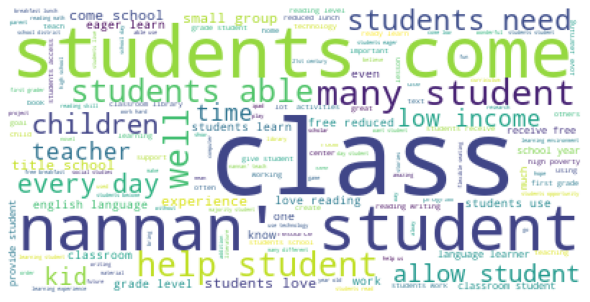

In [131]:
examine_cluster_with_wordcloud(cluster_dataset[5])

my yearbook class place students learning express creativity share creativity fellow classmates community the class composed high school students across many socio economic levels they primarily hispanic students several english language learners they excited expand skills explore new tools develop skills it desire encourage explore photojournalism graphic design career option i no budget purchase material class i took program year trying revitalize yearbook class fallen poor state i spent year trying fund raise new camera equipment order give students best experience possible when i took program beginning year one camera several years old poor condition through outside support i able obtain two new cameras the final piece i would like add good lens students take better pictures extracurricular activities sporting events in order give students better insight photojournalism i would like access equipment would likely use job through project i hope give students opportunity my district c

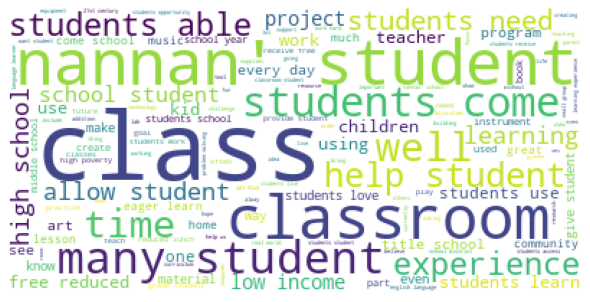

In [132]:
examine_cluster_with_wordcloud(cluster_dataset[6])

## 2.6 Apply AgglomerativeClustering</h2>

In [3]:
#Considering only 5k pts due to computational limits

In [0]:
X_tr_5k = X_tr[:5000]
X_train_5k = X_train[:5000]

In [66]:
X_tr.shape
X_tr_5k.shape

(5000, 5000)

### k=2 (clusters)

In [68]:
from sklearn.cluster import AgglomerativeClustering
X_tr_TFIDF_aggl = X_tr_5k.toarray()
aggl_cluster_2 = AgglomerativeClustering(n_clusters=2)
aggl_cluster_2.fit(X_tr_TFIDF_aggl)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [133]:
aggl_cluster_2.n_clusters

2

In [70]:
aggl_cluster_2.labels_

array([1, 1, 0, ..., 0, 1, 1])

In [134]:
cluster_dataset = {i:[] for i in range(aggl_cluster_2.n_clusters)}

for index in tqdm(range(aggl_cluster_2.labels_.shape[0])):    
    cluster_dataset[aggl_cluster_2.labels_[index]].append(X_train["preprocessed_essays"].iloc[index])

print("length of each cluster:")
for i in cluster_dataset:
    print(len(cluster_dataset[i]))

100%|██████████| 5000/5000 [00:00<00:00, 75602.20it/s]

length of each cluster:
3080
1920


### Examining each cluster and its wordcloud

my 1st grade students attend small school strong community our elementary school provides learning experience meets needs students instruction differentiated unique learner they like move love read love lots positive attention flexible seating choice provided students allows work around room comfortably focused it provides students environment need best every year students best get wiggles students best standing kneeling number positions little bodies find comfy the choices students feel invested responsible learning when i give students choices i see greater engagement excitement higher desire learn their effort increases certain amount pride comes work some immediate benefits flexible seating include burning calories using excess energy increased motivation engagement improving core strength overall posture the materials students need already home need help getting door the large carpet placed front classroom used gathering place mini lessons share time the bean bags carry around cus

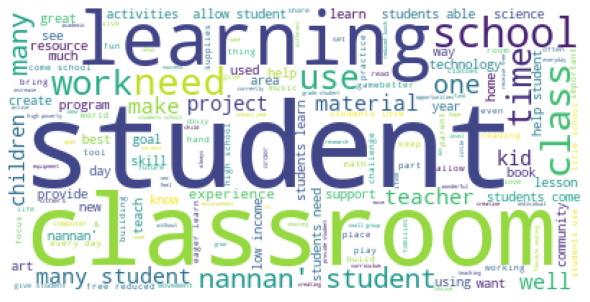

In [135]:
examine_cluster_with_wordcloud(cluster_dataset[0])

have ever made plans try new recipe create something you envisioned serving eating dish using new creation you may even started creating dish project found pause project not ingredients materials needed do remember disappointment frustration felt could not follow plan that sometimes happens students resources need succeed it amazing watch middle school students grow see evidence growth collaborative conversations writing student products data they learning set academic goals create plans utilize strategies meet goals unfortunately sometimes start moving full speed ahead toward achieving goals find not supplies resources need sadly lose momentum get back track success seventh eighth grade students use interactive notebooks learn constitution prepare federal constitution test the notebooks used take notes create study guides house foldable student products organizers student creations work social studies stations not interactive notebooks serve students well study constitution also serve

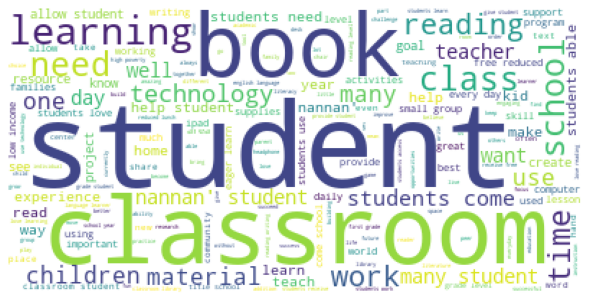

In [136]:
examine_cluster_with_wordcloud(cluster_dataset[1])

### k=5 (clusters)

In [74]:
from sklearn.cluster import AgglomerativeClustering
X_tr_TFIDF_aggl = X_tr_5k.toarray()
aggl_cluster_5 = AgglomerativeClustering(n_clusters=5)
aggl_cluster_5.fit(X_tr_TFIDF_aggl)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [75]:
aggl_cluster_5.n_clusters

5

In [76]:
aggl_cluster_5.labels_

array([4, 4, 2, ..., 1, 4, 3])

In [137]:
cluster_dataset = {i:[] for i in range(aggl_cluster_5.n_clusters)}

for index in tqdm(range(aggl_cluster_5.labels_.shape[0])):    
    cluster_dataset[aggl_cluster_5.labels_[index]].append(X_train["preprocessed_essays"].iloc[index])

print("length of each cluster:")
for i in cluster_dataset:
    print(len(cluster_dataset[i]))

100%|██████████| 5000/5000 [00:00<00:00, 71686.97it/s]

length of each cluster:
1413
1086
581
790
1130


### Examining each cluster and its wordcloud

my students eclectic mix movers shakers they full energy energy not always reserved playground this active group 34 students insists learning easier entire body involved they like freedom wiggle work my students come variety socioeconomic backgrounds ethnicities many school one constant lives no matter home life like one deserves opportunity learn environment welcoming encouraging as students become focused comfortable become productive reach highest potential potential sometimes surprises even my students told hard sit still work some described human bouncy balls wanted know important sit still i told 34 kids classroom not much sitting still part important seat seat respect space i thought discussion days later class meeting group students asked could get wiggle seats like seen classrooms i replied great idea asked one going pay chairs because great items classroom generously donated donorschoose suggested submit project asking chairs share brilliant idea i said we spent time looking 

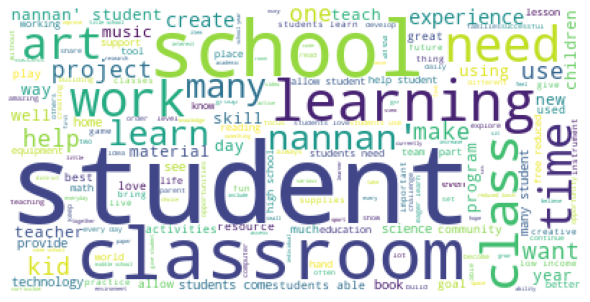

In [138]:
examine_cluster_with_wordcloud(cluster_dataset[0])

as teacher low income high poverty school district students faced many challenges classroom despite many challenges face i looking help engage learning exploring creativity us history they learn best active participation movement around classroom hands activities many challenges face may prevent getting ahead early life necessary supplies from minute walk classroom i focus potential growth i may not able control home lives however i control experience school day help ignite love learning especially american history by creative positive way i hopeful inspire even earliest learners continue path academic excellence my students materials needed participate active engaged learning activities the students use paper creating manipulatives help learn us history the paper also used differentiate instruction according student needs the markers glue scissors enable develop projects enable explore creativity bring history life the pens pencils provide students may not necessary materials class ab

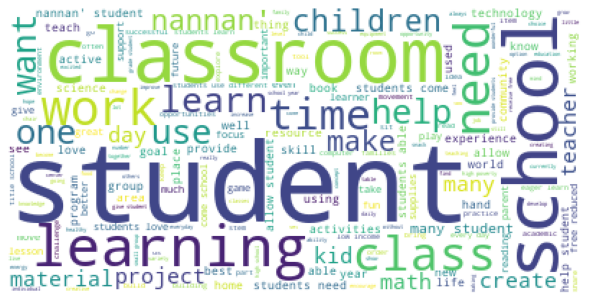

In [139]:
examine_cluster_with_wordcloud(cluster_dataset[1])

my 1st grade students attend small school strong community our elementary school provides learning experience meets needs students instruction differentiated unique learner they like move love read love lots positive attention flexible seating choice provided students allows work around room comfortably focused it provides students environment need best every year students best get wiggles students best standing kneeling number positions little bodies find comfy the choices students feel invested responsible learning when i give students choices i see greater engagement excitement higher desire learn their effort increases certain amount pride comes work some immediate benefits flexible seating include burning calories using excess energy increased motivation engagement improving core strength overall posture the materials students need already home need help getting door the large carpet placed front classroom used gathering place mini lessons share time the bean bags carry around cus

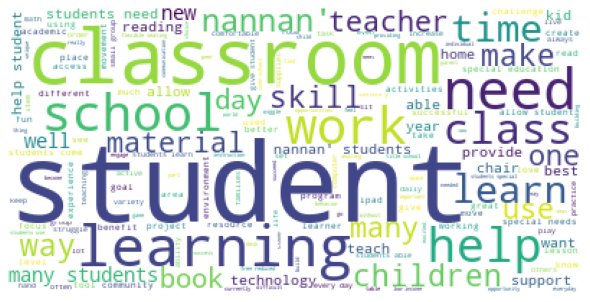

In [140]:
examine_cluster_with_wordcloud(cluster_dataset[2])

in first grade classroom students come variety backgrounds experiences two thirds students come families speak another language home we first graders fluent six different languages born asia africa latin america united states many students also come families experiencing poverty they love coming school love my first graders come school excited learn new things grow make friends play they active learners need movement throughout day maximize learning healthy jumping running place dancing stretching helps grow fun ready learning i engage families first graders home visits academic parent teacher teams the families students excited helping first graders become readers reading books home helping develop deeper understanding book talking books read home in class i students new united states learning speak english well learning read english their reading skills kindergarten pre kindergarten level they need interesting books beginning reading level take home read families while learning read 

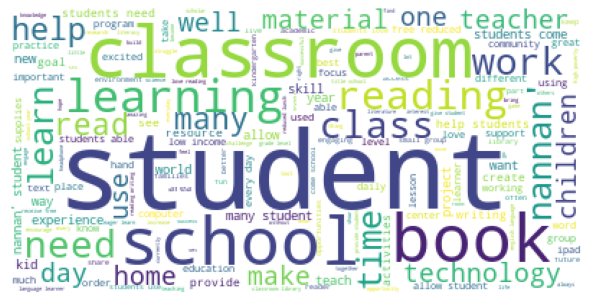

In [141]:
examine_cluster_with_wordcloud(cluster_dataset[3])

have ever made plans try new recipe create something you envisioned serving eating dish using new creation you may even started creating dish project found pause project not ingredients materials needed do remember disappointment frustration felt could not follow plan that sometimes happens students resources need succeed it amazing watch middle school students grow see evidence growth collaborative conversations writing student products data they learning set academic goals create plans utilize strategies meet goals unfortunately sometimes start moving full speed ahead toward achieving goals find not supplies resources need sadly lose momentum get back track success seventh eighth grade students use interactive notebooks learn constitution prepare federal constitution test the notebooks used take notes create study guides house foldable student products organizers student creations work social studies stations not interactive notebooks serve students well study constitution also serve

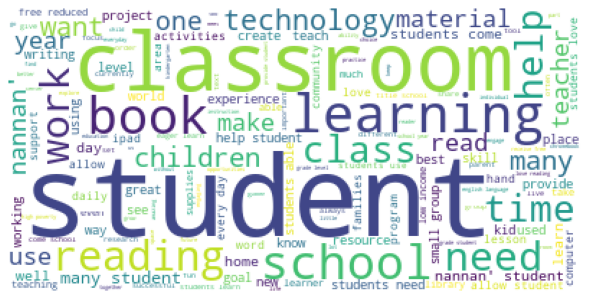

In [142]:
examine_cluster_with_wordcloud(cluster_dataset[4])

## 2.7 Apply DBSCAN 

### K-distance graph

In [98]:
%%time
from sklearn.neighbors import NearestNeighbors

NN = NearestNeighbors(n_neighbors=4).fit(X_tr_5k)
distances, indices = NN.kneighbors(X_tr_5k)

CPU times: user 1.59 s, sys: 62 ms, total: 1.65 s
Wall time: 1.66 s


In [0]:
sorted_dist = sorted(distances[:,-1])

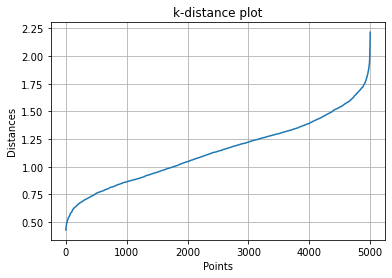

In [100]:
plt.plot(sorted_dist)
plt.grid(True)
plt.xlabel('Points')
plt.ylabel('Distances')
plt.title('k-distance plot')
plt.show()

### DBSCAN Algorithm with best eps

In [102]:
%%time
from sklearn.cluster import DBSCAN

# choose eps=1.60
dbscan = DBSCAN(eps=1.60)
dbscan.fit(X_tr_5k)

CPU times: user 1.39 s, sys: 61 ms, total: 1.45 s
Wall time: 1.45 s


In [144]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
dbscan_clusters=[[],[]]
for index in tqdm(range(dbscan.labels_.shape[0])):
    dbscan_clusters[dbscan.labels_[index]].append(X_train["preprocessed_essays"].iloc[index])

100%|██████████| 5000/5000 [00:00<00:00, 65791.35it/s]


In [147]:
for i in dbscan_clusters:
  print(len(i))

4765
235


### Examining each cluster and its wordcloud

my students eclectic mix movers shakers they full energy energy not always reserved playground this active group 34 students insists learning easier entire body involved they like freedom wiggle work my students come variety socioeconomic backgrounds ethnicities many school one constant lives no matter home life like one deserves opportunity learn environment welcoming encouraging as students become focused comfortable become productive reach highest potential potential sometimes surprises even my students told hard sit still work some described human bouncy balls wanted know important sit still i told 34 kids classroom not much sitting still part important seat seat respect space i thought discussion days later class meeting group students asked could get wiggle seats like seen classrooms i replied great idea asked one going pay chairs because great items classroom generously donated donorschoose suggested submit project asking chairs share brilliant idea i said we spent time looking 

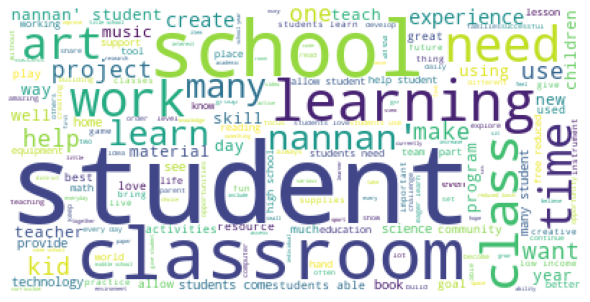

In [148]:
examine_cluster_with_wordcloud(cluster_dataset[0])

as teacher low income high poverty school district students faced many challenges classroom despite many challenges face i looking help engage learning exploring creativity us history they learn best active participation movement around classroom hands activities many challenges face may prevent getting ahead early life necessary supplies from minute walk classroom i focus potential growth i may not able control home lives however i control experience school day help ignite love learning especially american history by creative positive way i hopeful inspire even earliest learners continue path academic excellence my students materials needed participate active engaged learning activities the students use paper creating manipulatives help learn us history the paper also used differentiate instruction according student needs the markers glue scissors enable develop projects enable explore creativity bring history life the pens pencils provide students may not necessary materials class ab

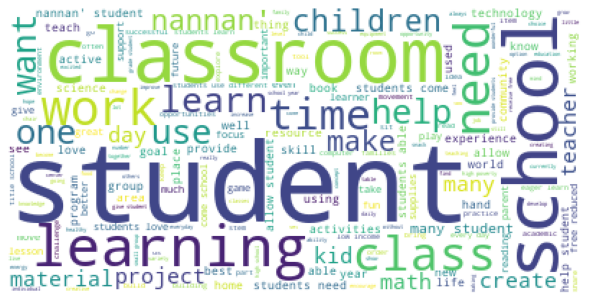

In [149]:
examine_cluster_with_wordcloud(cluster_dataset[1])

# 3. Conclusions

**K-Means**

```
1. Firstly we ran KMeans on k=[2, 3, 4, 5, 6, 7, 10, 15, 20].
2. Then we plotted K vs inertia graph and we observed that optimal k value is 7 using elbow knee method.
3. We plotted a word cloud for that cluster's preprocessed essay data.
```

**Agglomerative Clustering**

```
1. Agglomerative clustering works for dense matrices, so we converted into dense but considered only 5k pts due to computational limts.
2. I ran for n_clusters=[2,5]
3. We plotted a word cloud for that cluster's preprocessed essay data.

```
**DBSCAN**

```
1. There are two parameters eps, minpts.
2. So we plotted k-distance graph on distances(sorted) against no. of points.
3. Then we ran DBSCAN with optimal eps
4. We plotted a word cloud for that cluster's preprocessed essay data.

```


In [6]:
from prettytable import PrettyTable    
pt = PrettyTable(["ALgorithm","Vectorizer","parameters"])
pt.add_row(['KMeans','TFIDF','n_clusters=7'])
pt.add_row(['Agglomerative','TFIDF','n_clusters=2&5'])
pt.add_row(['DBSCAN','TFIDF','eps=1.60'])
print(pt)

+---------------+------------+----------------+
|   ALgorithm   | Vectorizer |   parameters   |
+---------------+------------+----------------+
|     KMeans    |   TFIDF    |  n_clusters=7  |
| Agglomerative |   TFIDF    | n_clusters=2&5 |
|     DBSCAN    |   TFIDF    |    eps=1.60    |
+---------------+------------+----------------+
